<a href="https://colab.research.google.com/github/Rakesh2711/AV/blob/master/WordCloud_for_NW_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Librraries



In [2]:
!pip install autocorrect
!pip install nltk

     |████████████████████████████████| 1.8MB 2.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.0.0-cp36-none-any.whl size=1811641 sha256=78655366403f25440b89df92a1a387499828718f2084a318d3351cf5c940bf2a
  Stored in directory: /root/.cache/pip/wheels/0b/06/bc/e66f28d72bed29591eadc79cebb2e7964ad0282804ab233da3
Successfully built autocorrect


In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Data

In [12]:
os.chdir('/content/drive/My Drive')

In [13]:
df1 = pd.read_excel('ReviewsRatings_Nationwide.xlsx',sheet_name=0,)

In [14]:
df1.head()

Reviews  Ratings
0  I've known the staff from Nationwide for 5 yea...      5.0
1  I have been with them for over 20 years and th...      4.0
2  I changed insurers this month because I did no...      4.0
3  Great customer service. Fast claim service. Ev...      5.0
4  After shopping around, Nationwide was quite a ...      5.0

In [15]:
def int_processing(data):
    data.dropna(inplace = True)
    data['Ratings'] = data['Ratings'].astype(int)
    return data

In [17]:
df1 = int_processing(df1)
df1

Reviews  Ratings
0     I've known the staff from Nationwide for 5 yea...        5
1     I have been with them for over 20 years and th...        4
2     I changed insurers this month because I did no...        4
3     Great customer service. Fast claim service. Ev...        5
4     After shopping around, Nationwide was quite a ...        5
...                                                 ...      ...
942   I had a horrible experience with this insuranc...        1
943   T-boned on driver's front quarter panel/door, ...        1
944   I was rear ended by an individual insured thro...        1
986   I had fender bender where I was backing up my ...        1
1012  Some matters seem more frustrating when the so...        2

[947 rows x 2 columns]

In [18]:
df1.head()

Reviews  Ratings
0  I've known the staff from Nationwide for 5 yea...        5
1  I have been with them for over 20 years and th...        4
2  I changed insurers this month because I did no...        4
3  Great customer service. Fast claim service. Ev...        5
4  After shopping around, Nationwide was quite a ...        5

In [21]:
df1['len_review'] = df1['Reviews'].apply(lambda x:len(x))

In [22]:
df1.head()

Reviews  Ratings  len_review
0  I've known the staff from Nationwide for 5 yea...        5         430
1  I have been with them for over 20 years and th...        4         519
2  I changed insurers this month because I did no...        4         317
3  Great customer service. Fast claim service. Ev...        5         255
4  After shopping around, Nationwide was quite a ...        5         253

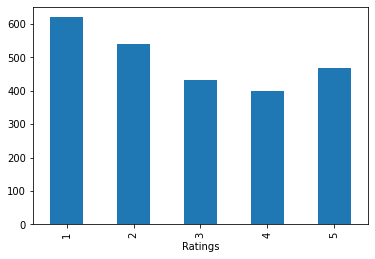

In [28]:
df1.groupby(['Ratings'])['len_review'].mean().plot(kind='bar')
plt.show()

In [32]:
df_rating5 = df1[df1['Ratings']==5]
df_rating4 = df1[df1['Ratings']==4]
df_rating3 = df1[df1['Ratings']==3]
df_rating2 = df1[df1['Ratings']==2]
df_rating1 = df1[df1['Ratings']==1]

# Rating one 

In [34]:
results = ''.join([words for words in df_rating1['Reviews']])
results

'Simply seeking SOME communication/clarification from "seller" agent H. ** but after NUMEROUS call on "hold" or disconnected learner she does not, "speak to customers"! WELL,...EXCUSE ME,.. I accepted your sales letter as TRUTH; how naive of me!Since May 12th I have been given incorrect billing, can never speak to the same agent, conflicting info about policy, then get a letter my policy is canceled! Don\'t even waste your time - you could end up uninsured without knowing!After receiving a quoted price on the phone with an agent I purchased insurance paying for a one year policy in full. Two weeks later I received an additional bill for the same policy. After a week of back and forth I finally got to talk to someone and their statement was that my price was raised due to a question on my credit report in spite of a 793 credit score. I cancelled my policy immediately and will not do business with this company again.To preface this review, I\'ve been with Nationwide for over 15 years wit

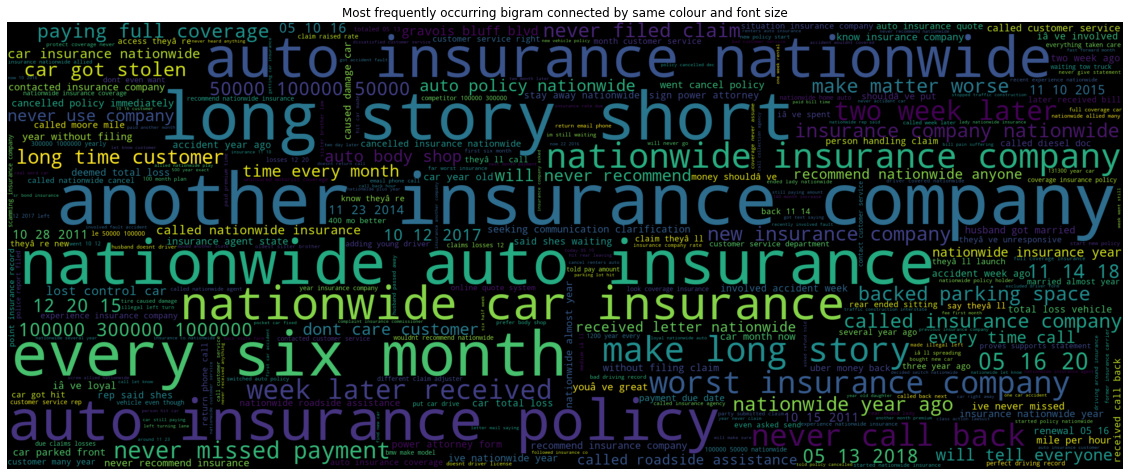

In [41]:
WNL = nltk.WordNetLemmatizer()
text = results
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

text_content = [c for c in text_content if not c.isdigit()]


# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = 20,9
plt.figure( figsize=(20,9))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, )
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Rating Two

In [42]:
results = ''.join([words for words in df_rating2['Reviews']])
results

'Getting my policy to go into effect from an online or verbal quote was difficult. Nationwide did not want to honor a quote that they provided to me. They tried to give me a policy at a higher cost than I was quoted. Cancelled my policy due to an incorrect credit/debit card number provided for billing through automatic payment.  Never took the responsibility to call me or send correspondence to tell me there was an issue with my credit card. They just cancelled my policy.Rates were good - went through a broker. I hit a bush - bumper got dislodged - nothing urgent. When I went to get assistance - that\'s when things took over 2 weeks to resolve through broker. Old technology (DOS) and my agent couldn\'t log into their system regularly. Billing issues were an issue as well - I truly got lost (2 cars, 1 home and business insurance). I\'ll be making a switch. Luckily I wasn\'t having an emergency. I can only imagine if I was.My insurance rate almost doubled after my first policy I had with

In [43]:
WNL = nltk.WordNetLemmatizer()
text = results
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

text_content = [c for c in text_content if not c.isdigit()]


# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = 20,9
plt.figure( figsize=(20,9))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, )
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Rating Three

In [44]:
results = ''.join([words for words in df_rating3['Reviews']])
results

"They just raised the rates significantly and my independent insurance agency suggested switching to Auto-Owners which I have done.Slow on processing claims. Nationwide took 5 months to provide a service to me as a customer to get a small $4000.00 med pay. Never has anyone taken this much time to provide an excellent customer with the benefits that they have already paid for and earned.Nationwide Insurance came through, but it wasn't without persistence, effort, or hassle. I bought the 'aftermarket' bumper to bumper warranty at the time of purchase. The truck, a decked out custom Ford F350, had a pile of aftermarket add ons already installed when purchased. A PacBrake Exhaust Brake, Banks Dynafast kit, Edge on-board computer, extra turbos, and airbags. The truck was built to tow heavy weights, and was initially awesome.I have tried to get my ex wife's name removed from my policy since day one, only to be given the runaround. Wasn't even married to her when I got the current policy, yet

In [45]:
WNL = nltk.WordNetLemmatizer()
text = results
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

text_content = [c for c in text_content if not c.isdigit()]


# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = 20,9
plt.figure( figsize=(20,9))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, )
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Rating Four

In [46]:
results = ''.join([words for words in df_rating4['Reviews']])
results

'I have been with them for over 20 years and they have been Good to me and my family, I love love the roadside assistance. Very prompt when on beltway. There is the rental car that is covered if needed it while my car got fixed. They took great care of me and taught me a thing or five. When a young kid hit me from behind and had no, sorry showed me a fake insurance card and what that process was. I was happy to learn something new but please be careful out there. Also, I wish they had a better accident forgiveness.I changed insurers this month because I did not get customer service that I thought I am entitled to. Would call my previous insurer and would not get a return call from the representative that I started with and I saved a couple hundred dollars with my auto & home policy. Switched from Liberty Mutual to Nationwide.My car was hit while parked by a Nationwide member and suffered a big dent and a crushed rear wheel. The member left a note with the number for a claim she had ope

In [47]:
WNL = nltk.WordNetLemmatizer()
text = results
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

text_content = [c for c in text_content if not c.isdigit()]


# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = 20,9
plt.figure( figsize=(20,9))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, )
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Rating Five

In [48]:
results = ''.join([words for words in df_rating4['Reviews']])
results

'I have been with them for over 20 years and they have been Good to me and my family, I love love the roadside assistance. Very prompt when on beltway. There is the rental car that is covered if needed it while my car got fixed. They took great care of me and taught me a thing or five. When a young kid hit me from behind and had no, sorry showed me a fake insurance card and what that process was. I was happy to learn something new but please be careful out there. Also, I wish they had a better accident forgiveness.I changed insurers this month because I did not get customer service that I thought I am entitled to. Would call my previous insurer and would not get a return call from the representative that I started with and I saved a couple hundred dollars with my auto & home policy. Switched from Liberty Mutual to Nationwide.My car was hit while parked by a Nationwide member and suffered a big dent and a crushed rear wheel. The member left a note with the number for a claim she had ope

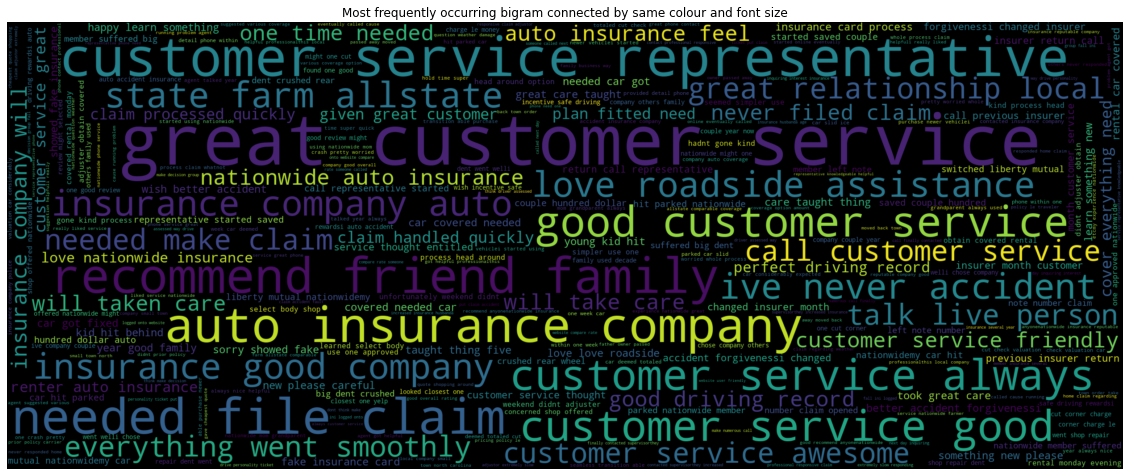

In [49]:
WNL = nltk.WordNetLemmatizer()
text = results
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_wc = set(STOPWORDS)
text_content = [word for word in text_content if word not in stopwords_wc]

text_content = [c for c in text_content if not c.isdigit()]


# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.trigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
# print (words_freq[:100])

#Generating wordcloud and saving as jpg image
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = 20,9
plt.figure( figsize=(20,9))
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 2500
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwords_wc, )
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring bigram connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()